# Examples

### Configuring Your Microphone (first time only)
Navigate to the AudioProject directory, run the indicated python script, and follow the prompt:
```shell
python songfp\mic_config\configure_input.py
0)   Microsoft Sound Mapper - Input
1)   Microphone (INSIGNIA USB MIC De
2)   Stereo Mix (Realtek High Defini
 >> 1
'Microphone (INSIGNIA USB MIC)' selected as input device```

This microphone preference will be saved to `AudioProject/songfp/mic_config/config.ini`, and will be used as the default mic.

### Testing Your Mic
Navigate to the AudioProject directory, run the indicated python script, and follow the prompt:

```shell
python songfp\mic_config\test_input.py

Using selected input device 'Microphone (INSIGNIA USB MIC De'
Recording audio for 5 seconds... (if this hangs, choose a different input device)
Finished recording
Playing back recording...
Finished playback
```

### Adding Songs to Fingerprint Database

In [1]:
import songfp
import songfp.database as db

Let's use a fresh song database specifically for this tutorial. 

In [2]:
db.switch_db("tutorial1")

No song database found. Creating empty database...
	Saving it will save to C:\Users\Ryan Soklaski\Desktop\CogWorks2019\AudioProject\songfp\database\tutorial1.pkl


You can call `songfp.database.switch_db()` with no argument to revert to the default database. Also, if you want to load a database at a specific instance, you can call `songfp.database.load_song_db`. This can be useful if you are deploying a service, and want to control when things load. Otherwise, the utilities provided by `songfp` will automatically lazy-load the database.

In [3]:
# empty database to start with
songfp.list_songs()

[]

Simply indicate paths to song files (.mp3, .wav, and maybe other formats) that you want to add to the database. You can also provide the song name and artist, if you want the output of the song-recognition to be verbose.

In [4]:
from time import time

In [5]:
songs = [r"C:\Users\Ryan Soklaski\Desktop\Ryan's Music\AFI\Black Sails in the Sunset - A.F.I\At A Glance- AFI.mp3",
         r"C:\Users\Ryan Soklaski\Desktop\Ryan's Music\Battles\Gloss Drop\03 - Futura.mp3",
         r"C:\Users\Ryan Soklaski\Desktop\Ryan's Music\Future Islands\Singles\04 - Doves.mp3"]
names = ["At a Glance", "Futura", "Doves"]
artists = ["AFI", "Battles", "Future Islands"]

start = time()
db.add_songs(songs, names, artists)
dt = time() - start
dt

adding At a Glance..
adding Futura..
adding Doves..
3 songs added to the database. 

Be sure to run `songfp.database.save()


81.52525472640991

Save database to disk - database will be loaded in its present state the next time `songfp` is imported. Run `songfp.clear_database(True)` to delete the database from disk.

In [7]:
db.save()

Song database saved to: C:\Users\Ryan\Desktop\AudioProject\songfp\database\tutorial.pkl


### Listening for a Match
Once you have populated your fingerprint database, simply begin playing your music to your configured microphone, and run `match_recording(10)` to record a 10 second clip (10 seconds is recommended for reliable results.

In [6]:
from songfp import match_recording
match_recording(10)

Using input device 'Microphone Array (Realtek High'
Recording ended


'Futura by Battles'

### Plotting the Spectragram + Fingerprints

Using input device 'Microphone Array (Realtek High '
Recording audio for 10 seconds... (if this hangs, choose a different input device)
Finished recording


<IPython.core.display.Javascript object>


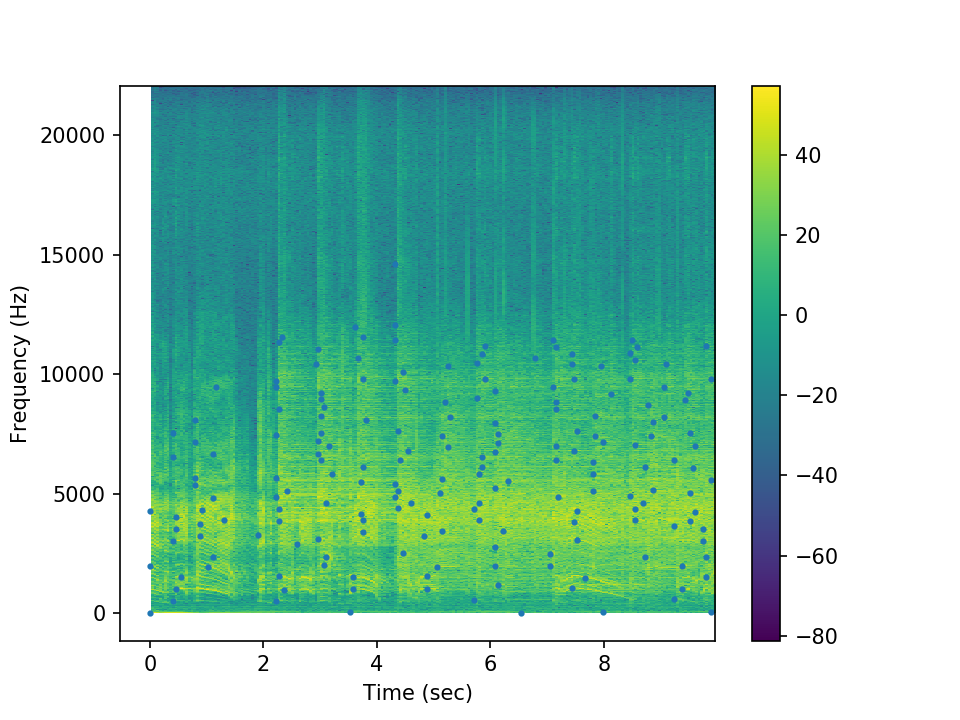

In [30]:
# make sure the plots render in the notebook
%matplotlib notebook 
from songfp import plot_recording, plot_song

# plot a 10 second recording
fig, ax = plot_recording(10)

You can do the same for a full song by providing the file path, or the numpy-array containing the pcm signal